In [42]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.signal import find_peaks

from sre_parse import CATEGORIES


##all = pd.DataFrame(pd.read_excel('left_rigth_classification.xlsx'))
all = pd.DataFrame(pd.read_excel('complete_data_up_down.xlsx'))

all.dropna()
all.shape

data = all[['acc.ax','acc.ay','acc.az','acc.gx','acc.gy','acc.gz','gyro.gx','gyro.gy','gyro.gz','timestamp']]
target = all[['target']]
target_names = all[['target.names']]
print(all)





        acc.ax    acc.ay    acc.az  acc.gx  acc.gy  acc.gz   gyro.gx  \
0    -0.037088  0.193736  1.096536    1.19   -4.41    0.35  4.313044   
1     0.029280 -0.057584  0.921344    2.31   -6.79   -4.34 -4.730435   
2     0.007320  0.103456  1.143384    1.68   -4.90   -1.75  3.547826   
3     0.034160  0.111752  0.853024    0.56   -3.57   -3.29  0.486957   
4     0.006832 -0.111264  1.054080   -1.96   -3.36   -1.61  2.295652   
...        ...       ...       ...     ...     ...     ...       ...   
1778  0.048312  0.019032  0.843752   -4.20   -4.69   -0.70  6.608696   
1779 -0.015128  0.136640  1.009184   -0.28   -5.74   -1.40  3.130435   
1780 -0.024400  0.054168  1.040416    1.96   -4.90   -1.82  1.460870   
1781 -0.048800  0.334768  0.969656    2.38   -4.97   -2.66 -6.956522   
1782  0.010248  0.030256  1.084824    2.24   -1.82   -2.80 -0.347826   

       gyro.gy   gyro.gz      timestamp  target target.names  
0     2.434783 -0.208696  1662115415043       1           up  
1    -2.5

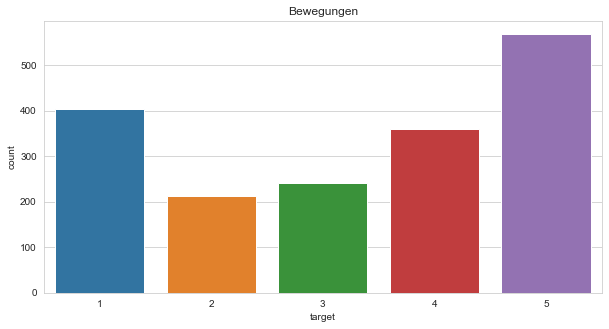

In [43]:
sns.set_style('whitegrid') 
plt.figure(figsize = (10, 5)) 
sns.countplot(x = 'target', data = all) 
plt.title('Bewegungen') 
plt.show()

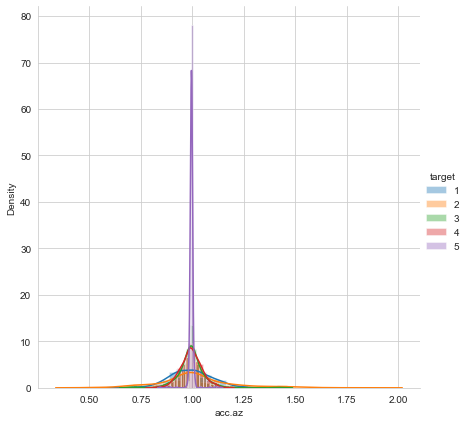

In [44]:
sns.FacetGrid(all, hue = 'target', size = 6).map(sns.distplot, 'acc.az').add_legend()

In [45]:
accgy_list = []
accgx_list = []
accay_list = []
accax_list = []
train_labels = []



step_size = 5

# creating overlaping windows of size window-size 100
for i in range(0, data.shape[0], step_size):
    accax = data['acc.ax'].values[i: i + 50]
    accay = data['acc.ay'].values[i: i + 50]
    accgx = data['acc.gx'].values[i: i + 50]
    accgy = data['acc.gy'].values[i: i + 50]
    label = stats.mode(target[i: i + 50])[0][0]

    print(label)
    accax_list.append(accax)
    accay_list.append(accay)
    accgx_list.append(accgx)
    accgy_list.append(accgy)
    train_labels.append(label)

# Statistical Features on raw x, y and z in time domain
X_data = pd.DataFrame()

# mean
X_data['accax_mean'] = pd.Series(accax_list).apply(lambda x: x.mean())
X_data['accay_mean'] = pd.Series(accay_list).apply(lambda x: x.mean())
X_data['accgx_mean'] = pd.Series(accgx_list).apply(lambda x: x.mean())
X_data['accgy_mean'] = pd.Series(accgy_list).apply(lambda x: x.mean())

# std dev
X_data['accax_std'] = pd.Series(accax_list).apply(lambda x: x.std())
X_data['accay_std'] = pd.Series(accay_list).apply(lambda x: x.std())
X_data['accgx_std'] = pd.Series(accgx_list).apply(lambda x: x.std())
X_data['accgy_std'] = pd.Series(accgy_list).apply(lambda x: x.std())

# avg absolute diff
X_data['accax_aad'] = pd.Series(accax_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accay_aad'] = pd.Series(accay_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgx_aad'] = pd.Series(accgx_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))
X_data['accgy_aad'] = pd.Series(accgy_list).apply(lambda x: np.mean(np.absolute(x - np.mean(x))))

# min
X_data['accax_min'] = pd.Series(accax_list).apply(lambda x: x.min())
X_data['accay_min'] = pd.Series(accay_list).apply(lambda x: x.min())
X_data['accgx_min'] = pd.Series(accgx_list).apply(lambda x: x.min())
X_data['accgy_min'] = pd.Series(accgy_list).apply(lambda x: x.min())

# max
X_data['accax_max'] = pd.Series(accax_list).apply(lambda x: x.max())
X_data['accay_max'] = pd.Series(accay_list).apply(lambda x: x.max())
X_data['accgx_max'] = pd.Series(accgx_list).apply(lambda x: x.max())
X_data['accgy_max'] = pd.Series(accgy_list).apply(lambda x: x.max())

# max-min diff
X_data['accax_maxmin_diff'] = X_data['accax_max'] - X_data['accax_min']
X_data['accay_maxmin_diff'] = X_data['accay_max'] - X_data['accay_min']
X_data['accgx_maxmin_diff'] = X_data['accgx_max'] - X_data['accgx_min']
X_data['accgy_maxmin_diff'] = X_data['accgy_max'] - X_data['accgy_min']

# median
X_data['accax_median'] = pd.Series(accax_list).apply(lambda x: np.median(x))
X_data['accay_median'] = pd.Series(accay_list).apply(lambda x: np.median(x))
X_data['accgx_median'] = pd.Series(accgx_list).apply(lambda x: np.median(x))
X_data['accgy_median'] = pd.Series(accgy_list).apply(lambda x: np.median(x))

# median abs dev 
X_data['accax_mad'] = pd.Series(accax_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accay_mad'] = pd.Series(accay_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgx_mad'] = pd.Series(accgx_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))
X_data['accgy_mad'] = pd.Series(accgy_list).apply(lambda x: np.median(np.absolute(x - np.median(x))))

# interquartile range
X_data['accax_IQR'] = pd.Series(accax_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accay_IQR'] = pd.Series(accay_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgx_IQR'] = pd.Series(accgx_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
X_data['accgy_IQR'] = pd.Series(accgy_list).apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))

# negtive count
X_data['accax_neg_count'] = pd.Series(accax_list).apply(lambda x: np.sum(x < 0))
X_data['accay_neg_count'] = pd.Series(accay_list).apply(lambda x: np.sum(x < 0))
X_data['accgx_neg_count'] = pd.Series(accgx_list).apply(lambda x: np.sum(x < 0))
X_data['accgy_neg_count'] = pd.Series(accgy_list).apply(lambda x: np.sum(x < 0))

# positive count
X_data['accax_pos_count'] = pd.Series(accax_list).apply(lambda x: np.sum(x > 0))
X_data['accay_pos_count'] = pd.Series(accay_list).apply(lambda x: np.sum(x > 0))
X_data['accgx_pos_count'] = pd.Series(accgx_list).apply(lambda x: np.sum(x > 0))
X_data['accgy_pos_count'] = pd.Series(accgy_list).apply(lambda x: np.sum(x > 0))

# values above mean
X_data['accax_above_mean'] = pd.Series(accax_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accay_above_mean'] = pd.Series(accay_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accgx_above_mean'] = pd.Series(accgx_list).apply(lambda x: np.sum(x > x.mean()))
X_data['accgy_above_mean'] = pd.Series(accgy_list).apply(lambda x: np.sum(x > x.mean()))

# number of peaks
X_data['accax_peak_count'] = pd.Series(accax_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accay_peak_count'] = pd.Series(accay_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accgx_peak_count'] = pd.Series(accgx_list).apply(lambda x: len(find_peaks(x)[0]))
X_data['accgy_peak_count'] = pd.Series(accgy_list).apply(lambda x: len(find_peaks(x)[0]))

# energy
X_data['accax_energy'] = pd.Series(accax_list).apply(lambda x: np.sum(x**2)/100)
X_data['accay_energy'] = pd.Series(accay_list).apply(lambda x: np.sum(x**2)/100)
X_data['accgx_energy'] = pd.Series(accgx_list).apply(lambda x: np.sum(x**2)/100)
X_data['accgy_energy'] = pd.Series(accgy_list).apply(lambda x: np.sum(x**2)/100)

# skewness
#X_data['accax_skewness'] = pd.Series(accax_list).apply(lambda x: stats.skew(x))
#X_data['accay_skewness'] = pd.Series(accay_list).apply(lambda x: stats.skew(x))
#X_data['accgx_skewness'] = pd.Series(accgx_list).apply(lambda x: stats.skew(x))

# kurtosis
#X_data['accax_kurtosis'] = pd.Series(accax_list).apply(lambda x: stats.kurtosis(x))
##X_data['accay_kurtosis'] = pd.Series(accay_list).apply(lambda x: stats.kurtosis(x))
#X_data['accgx_kurtosis'] = pd.Series(accgx_list).apply(lambda x: stats.kurtosis(x))


# avg resultant
#X_data['avg_result_accl'] = [i.mean() for i in ((pd.Series(accax_list)**2 + pd.Series(accay_list)**2 + pd.Series(accgx_list)**2 + pd.Series(accgy_list)**2)**0.5)]

# signal magnitude area
#X_data['sma'] =  pd.Series(accax_list).apply(lambda x: np.sum(abs(x)/100)) + pd.Series(accay_list).apply(lambda x: np.sum(abs(x)/100)) \
#                  + pd.Series(accgx_list).apply(lambda x: np.sum(abs(x)/100) + pd.Series(accgy_list).apply(lambda x: np.sum(abs(x)/100))

SyntaxError: incomplete input (2522065347.py, line 129)

In [ ]:
print(X_data)

     accax_mean  accay_mean  accgx_mean  accgy_mean  accax_std  accay_std  \
0      0.019296    0.074898    0.628600   -4.291000   0.041984   0.078169   
1      0.023951    0.075913    0.509600   -4.506600   0.049128   0.095580   
2      0.024790    0.078548    0.483000   -4.652200   0.053820   0.114124   
3      0.011341    0.082599    0.511000   -4.643800   0.094960   0.122136   
4      0.013537    0.080735    0.429800   -4.599000   0.096263   0.121903   
..          ...         ...         ...         ...        ...        ...   
352    0.004286    0.098491    0.036522   -4.376522   0.045445   0.088773   
353   -0.002060    0.098847   -0.093333   -4.351667   0.049250   0.100287   
354   -0.000601    0.084199   -0.269231   -4.469231   0.046204   0.100325   
355    0.001281    0.117791   -1.522500   -4.357500   0.029244   0.096077   
356   -0.020984    0.139731    2.193333   -3.896667   0.024227   0.138257   

     accgx_std  accgy_std  accax_aad  accay_aad  ...  accgx_above_mean  \
0

In [ ]:
X = X_data
y = train_labels


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=150, random_state=42)

logreg.fit(X_train,y_train)

##print(X_data2)
##print(y_train)

y_pred = logreg.predict(X_test)


print(y_pred)

from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))
##print(classification_report(y_test,y_pred))



[4 1 5 5 1 5 1 1 5 3 2 5 4 5 3 3 5 5 3 5 3 4 5 1 4 4 3 5 1 1 5 1 5 3 1 1 1
 5 2 1 5 1 5 2 3 4 1 1 1 4 5 4 5 2 5 4 1 2 1 5 1 1 4 2 1 2 5 4 5 2 5 4 5 5
 5 1 5 5 1 1 3 1 5 3 5 5 4 3 2 5 1 2 5 2 5 4 1 3 1 2 5 4 5 3 3 4 5 4]
0.9722222222222222


In [ ]:
from sklearn.ensemble import RandomForestClassifier



reg_rf = RandomForestClassifier()
reg_rf.fit(X_train, y_train)
y_pred = reg_rf.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.93      1.00      0.96        25
           2       0.94      1.00      0.97        15
           3       0.92      0.79      0.85        14
           4       1.00      0.94      0.97        17
           5       1.00      1.00      1.00        37

    accuracy                           0.96       108
   macro avg       0.96      0.95      0.95       108
weighted avg       0.96      0.96      0.96       108



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

reg_knn = KNeighborsClassifier()
reg_knn.fit(X_train, y_train)
y_pred = reg_knn.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.96      0.92      0.94        25
           2       1.00      0.93      0.97        15
           3       0.86      0.86      0.86        14
           4       0.94      1.00      0.97        17
           5       0.95      0.97      0.96        37

    accuracy                           0.94       108
   macro avg       0.94      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



In [ ]:
feature_df = pd.DataFrame({'Importance':reg_rf.feature_importances_, 'Features': X_data.columns })
print(feature_df)

    Importance           Features
0     0.011102         accax_mean
1     0.002738         accay_mean
2     0.009508         accgx_mean
3     0.005538         accgy_mean
4     0.044878          accax_std
5     0.035230          accay_std
6     0.018519          accgx_std
7     0.014320          accgy_std
8     0.043650          accax_aad
9     0.033934          accay_aad
10    0.014901          accgx_aad
11    0.007135          accgy_aad
12    0.021387          accax_min
13    0.038605          accay_min
14    0.011787          accgx_min
15    0.008876          accgy_min
16    0.046748          accax_max
17    0.006071          accay_max
18    0.004505          accgx_max
19    0.014629          accgy_max
20    0.034925  accax_maxmin_diff
21    0.026936  accay_maxmin_diff
22    0.002802  accgx_maxmin_diff
23    0.015477  accgy_maxmin_diff
24    0.015370       accax_median
25    0.003498       accay_median
26    0.013213       accgx_median
27    0.004879       accgy_median
28    0.061075

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
# standardization
scaler = StandardScaler()
scaler.fit(X_train)
X_data_data_lr = scaler.transform(X_train)
X_test_data_lr = scaler.transform(X_test)
# logistic regression model
lr = LogisticRegression(max_iter =150, random_state = 0)
lr.fit(X_data_data_lr, y_train)
y_pred = lr.predict(X_test_data_lr)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\n -------------Classification Report-------------\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.9907407407407407

 -------------Classification Report-------------

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        25
           2       1.00      0.93      0.97        15
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        17
           5       1.00      1.00      1.00        37

    accuracy                           0.99       108
   macro avg       0.99      0.99      0.99       108
weighted avg       0.99      0.99      0.99       108

